# 1 - Introdution

## Final Project - Titanic Case

            This project has a objective to analyse Datas from the Titanic Ship historic disaster. The dataset was provided by Udacity as a Final Project for students of Data Science I - Fundamentals.
    
    
            At this moment we start making questions to our dataset like:
            
        Q-01 - How many percent percent are there for lost and alive people according to Age Category?
        Q-02 - What are the Age Categories percentages for Alive People?
        Q-03 - What are the Age Categories percentages for Lost People?
        Q-04 - What are the percentages for Alive and Lost People at Titanic Disaster?
        Q-05 - What's the Gender percentage for Alive People?
        Q-06 - What's the Gender percentage for Lost People?
        Q-07 - Considering Age Category. What's the difference between gender according to Alive People?
        Q-08 - Considering Age Category. What's the difference between gender according to Lost People?

# 2 - Cleaning Steps

            Verifying null values, duplicates, inconsistencies to clean and organize datas with the best practices of Data  Science.
            
## Data Preparing Content

            Every data was treated and explained through code cleaning process at moment we type each one of them.

## Inicial Phase - Importing Python libraries and 'csv file' to work with datas

In [32]:
import pandas as pd  # Importing Pandas library
import numpy as np   # Importing Numpy library
import matplotlib.pyplot as plt # Importing Matplotlib library
import matplotlib.patches as pls # Importing Matplotlib library
import seaborn as sns # Importing Seaborn library

% matplotlib inline
sns.set_style('darkgrid')

dft = pd.read_csv('titanic.csv')
dft.columns = map(str.lower, dft.columns)

dft.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Verifying Null Values into dataset

In [33]:
#Count Null values
dft.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

## Creating Category for Age and analysing by group after

            Category name: 'age_catedory'.
            
            children: 00 to 12 years old.
                teen: 13 to 19 years old.
               adult: 20 to 50 years old.
                 old: over 50 years old.
         
            Null valeus: set as 'nan' for while.

In [34]:
#Usind Numpy, it was created a new column as category age of people
dft['age_category'] = np.where(dft['age'] < 13, 'Children',
                      np.where(dft['age'] < 20, 'Teen',
                      np.where(dft['age'] < 50, 'Adult',
                      np.where(dft['age'] >= 50, 'Old', np.nan))))

## Taking off Full Values to Save into a New Dataset
        
            Saving a list with full Values according to ['age'] column.

In [35]:
dff = dft.dropna(subset=['age']) # take off null to calculate proportions
dff.shape # only columns with full Age values

(714, 13)

## Saving and applying proportions to null values according to ['age'] column
        
### Saving Variables to apply into age null values
            
            lna = 'Saving a null list according to ['age'] column'.
            tna = 'Total null values for ['age'] column'.
             
### Find proportion and multiply for total age null values

            Formula: (cat = Age Caterory, tla = Total Age not null, na = Total Null Ages)
             
$$ta = (\frac{cat}{tla})*na$$

            ta = Adult quantities applyed to null values.
            tc = Children quantities applyed to null values.
            to = Old quantities applyed to null values.
            tt = Teen quantities applyed to null values.

In [36]:
lna = dft[dft['age'].isnull()] # Null List according to column 'Age'
tna = lna.count()['age_category'] # Null count according to column 'Age'

def tlaca(a1): # Into a Age Null proportion, indentfy Quantities by Age Category choosing column data from it.
    return int(round((dft[dft['age_category'] == a1].shape[0]/dff['age_category'].shape[0])*tna))

# Applying proportion and multiplying for null count
ta = tlaca('Adult')
tc = tlaca('Children')
to = tlaca('Old')
tt = tlaca('Teen')

print('Total to be applyed into null list:\n')
print(' ta = Adults: {}\n tc = Children:{}\n to = Old:{}\n tt = Teen:{}'.format(ta, tc ,to ,tt)) # Result

Total to be applyed into null list:

 ta = Adults: 118
 tc = Children:17
 to = Old:18
 tt = Teen:24


## Saving medians for 'age_category'

            ma = Adult Median.
            mc = Children Median.
            mo = Old Median.
            mt = Teen Median.

In [37]:
# at same way I can save using group by the median by definition:

def mlaca(a1): # Median of a filtered list by Age Category choosing column data from it.
    return round(dft[dft['age_category'] == a1].median()['age'])

ma = mlaca('Adult')
mc = mlaca('Children')
mo = mlaca('Old')
mt = mlaca('Teen')

print('Median to be applyed into null list:\n')
print(' ma = Adults: {}\n mc = Children: {}\n mo = Old: {}\n mt = Teen: {}'.format(ma, mc ,mo ,mt)) # Result

Median to be applyed into null list:

 ma = Adults: 30.0
 mc = Children: 4.0
 mo = Old: 56.0
 mt = Teen: 18.0


## Creating and appending median to null Age values

            lna = 'Saving a null list according to ['age'] column'.
            
            ma = Adult Median.        ta = Adult quantities applyed to null values.                        
            mc = Children Median.     tc = Children quantities applyed to null values.
            mo = Old Median.          to = Old quantities applyed to null values.
            mt = Teen Median.         tt = Teen quantities applyed to null values.
            
            A replaced Partial list into ['age'] null valeus according to Median.
            
            dfta = Filtered list with 'ta' applyed with 'ma' into ['age'] null values.
            dftc = Filtered list with 'tc' applyed with 'mc' into ['age'] null values.
            dfto = Filtered list with 'to' applyed with 'mo' into ['age'] null values.
            dftt = Filtered list with 'tc' applyed with 'mc' into ['age'] null values.
            
            dftn = New List fulfilled with the replaced new values into ['age'] column.

In [38]:
# Filtering Data Lists according to informations above.
dfta = lna.head(ta)
dfta = dfta.fillna({'age':ma})

dftc = lna.iloc[ta:,:].head(tc)
dftc = dftc.fillna({'age':mc})

dfto = lna.iloc[ta+tc:,:].head(to)
dfto = dfto.fillna({'age':mo})

dftt = lna.iloc[ta+tc+to:,:].head(tt)
dftt = dftt.fillna({'age':mt})

# Appending New fullfild Data Lists..
dftn = dfta.append(dftc)
dftn = dftn.append(dfto)
dftn = dftn.append(dftt)

print('Category to be reprocessed\n\n', round(dftn.groupby('age_category').age.agg(['size','median'])),'\n') # Group by

Category to be reprocessed

               size  mean
age_category            
nan            177  29.0 



## Reprocessing 'age_category' and Print

In [39]:
dftn['age_category'] = np.where(dftn['age'] < 13, 'Children',
                       np.where(dftn['age'] < 20, 'Teen',
                       np.where(dftn['age'] < 50, 'Adult',
                       np.where(dftn['age'] >= 50, 'Old', np.nan))))

print('Category reprocessed\n\n', round(dftn.groupby('age_category').age.agg(['size','mean'])),'\n') # Group by

Category reprocessed

               size  mean
age_category            
Adult          118  30.0
Children        17   4.0
Old             18  56.0
Teen            24  18.0 



## Comparing column types

In [40]:
dftn.dtypes == dft.dtypes

passengerid     True
survived        True
pclass          True
name            True
sex             True
age             True
sibsp           True
parch           True
ticket          True
fare            True
cabin           True
embarked        True
age_category    True
dtype: bool

## Dropping Null list according to 'Age'

In [41]:
print('All Dataset: ', dft.shape) # All Dataset
dft = dft[dft['age'].notnull()] # Full Age Dataset
print('Full Dataset: ', dft.shape) # Full Age Dataset

All Dataset:  (891, 13)
Full Dataset:  (714, 13)


## Appending New list with the 'Age' cleaned to Full Age Dataset

In [42]:
dft = dft.append(dftn) # Append Cleaned
dft.shape # quantity

(891, 13)

## Replace Missing Datas with Text for 'Embarked'!

In [43]:
#Replacing Embarked Null Values and Checking
dft['embarked'].fillna('U', inplace=True) # U == Unknown Place 
print(dft.groupby('embarked').size(),'\n') # Verify by Group
print('Tota Embarked: {}'.format(sum(dft.groupby('embarked').size()))) # Checking size

embarked
C    168
Q     77
S    644
U      2
dtype: int64 

Tota Embarked: 891


## Replace Missing Datas with UCN for 'Cabin'!

In [44]:
#Replacing Cabin Null Values and Checking
dft['cabin'].fillna('UCN', inplace=True) # UCN == Unknown Cabin Number 
print('Total: {}'.format(sum(dft.groupby('cabin').size()))) # Checking Total in format way

Total: 891


## Checking if you still have missing values

In [45]:
#Checking Missing fill steps
dft.isnull().sum()

passengerid     0
survived        0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
age_category    0
dtype: int64

## Checking and Dropping Duplicates

In [46]:
dft.duplicated().sum() # No duplicated data

0

In [47]:
round(dft.groupby(['age_category']).age.agg(['size','mean'])) # Group by

,size,mean
age_category,,
Adult,594,31.0
Children,86,5.0
Old,92,57.0
Teen,119,17.0


## Correcting Column 'Survived'

            1 = Alive.
            0 = Lost.
            
            df_al = A survived group by for survived people.

In [48]:
dft.survived.replace([1, 0], ['Alive', 'Lost'], inplace=True)

# 03 - Analysis Definitions

### Total Stacked Bar Chart Definition

            dfc1 = Choose a valid Column 1 name to group.
            dfc2 = Choose a valid Column 2 name to group.
              c1 = Choose color 1.
              c2 = Choose color 2.
       def tbarc = Total bar chart.

In [49]:
def tl_barc(dfc1, dfc2, c1, c2): # Explanation above
    return ((dft.groupby([dfc1, dfc2]).size()/dft.shape[0])*100).unstack().plot(
                    kind='bar',
                    stacked=True,    
                    title='Gender Stacked Bar Chart for Gender',
                    color=[c1,c2],
                    figsize=(9,7),
                    fontsize=10,
                    rot=0);

### Alive or Lost Stacked Bar Chart Definition

              lc = Life Condition, choose 'Alive' or 'Lost'.
            dfc1 = Choose a valid Column 1 name to group.
            dfc2 = Choose a valid Column 2 name to group.
              c1 = Choose color 1.
              c2 = Choose color 2.
         lc_barc = Life Condition bar chart. 

In [50]:
def lc_barc(lc, dfc1, dfc2, c1, c2): # Explanation above
    return ((dft[dft['survived']==lc].groupby([dfc1, dfc2]).size()/
             dft[dft['survived']==lc].shape[0])*100).unstack().plot(
                    kind='bar',
                    stacked=True,    
                    title='Gender Stacked Bar Chart for Gender',
                    color=[c1,c2],
                    figsize=(9,7),
                    fontsize=10,
                    rot=0);

### Pie Chart Variables

               ac = Age Categories list.
            lb_ac = List of Age Categories.
          cols_ac = Defined colors for Age Categories.
          cols_lc = Defined colors for Life Conditions. (Alive or Lost)
              glc = Grouped by Life Conditions. (Alive or Lost)
              ulc = Unique list for glc.
            lb_gc = Gender Category ascending.

In [51]:
lb_ac = list(dict(dft.groupby('age_category').size()))
cols_ac = ['c', 'y', 'g', 'r']
cols_lc = ['c', 'r']
glc = dft.groupby(['survived'])['embarked'].size()
ulc = list(dict(glc))
lb_gc = pd.Series(pd.unique(dft['sex'])).sort_values(ascending=True)

### Pie Chart Defitions

     def gc_piec = Pie Chart for Gender Group by for a choosen life conditions. (Alive or Lost)
     def ac_piec = Pie Chart for Age Categories Group by for a choosen life conditions. (Alive or Lost)
              lc = Choose life conditions. (Alive or Lost)

In [98]:
def gc_piec(lc):
    return plt.pie(dft[dft['survived']==lc].groupby(['sex']).size(),
                   textprops={'fontsize': 12},
                   colors=cols_lc,
                   startangle=90,
                   shadow=True,
                   explode=(0.1,0.1),
                   autopct='%0.2f%%',
                   radius=1);

In [99]:
def ac_piec(lc):
    plt.pie(dft[dft['survived']==lc].groupby(['age_category']).size(),
            textprops={'fontsize': 12},
            colors=cols_ac,
            startangle=90,
            shadow=True,
            explode=(0.1,0.15,0.15,0.08),
            autopct='%0.2f%%',
            radius=1);

# Pie and Bar Analysis Progressions

## Q-01 - Life Conditions Stacked Bar Chart Analysis for Age Category

            a1 = Grouped by Age Category and Gender.

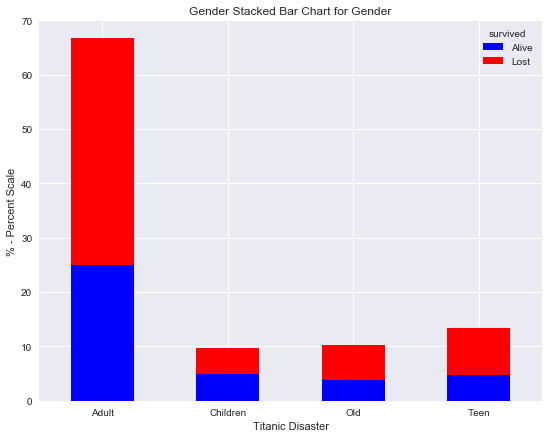

In [54]:
tl_barc('age_category', 'survived', 'b', 'r')

plt.xlabel('Titanic Disaster');
plt.ylabel('% - Percent Scale');

## Q-01 - Stacked Bar Above

            According to life conditions between Alive and Lost people clearly we see our losts were greater for Adults, Teens and Olds. Thus only Children had a different end.

## Q-02 - Pie Chart Among Age Category for Alive People %

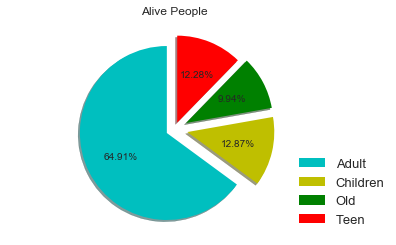

In [100]:
plt.axis('equal');
plt.title('Alive People');
ac_piec('Alive');


plt.legend(lb_ac, bbox_to_anchor=(1,0), loc='lower center', fontsize=12);


## Q-02 - Pie Chart Above

            In this case we found those Adults with almost 65% of alives in reference to others.

## Q-03 - Pie Chart Among Age Category for Lost People %

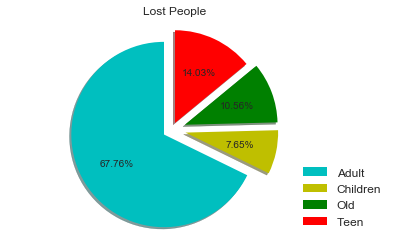

In [101]:
ac_piec('Lost')

plt.title('Lost People');
plt.legend(lb_ac, bbox_to_anchor=(1,0), loc='lower center', fontsize=12);
plt.axis('equal');

## Q-03 - Pie Chart Above

            In this case we found those Adults with almost 70% of losts in reference to others.

## Q-04 - Pie Chart Between Lost and Alive People %

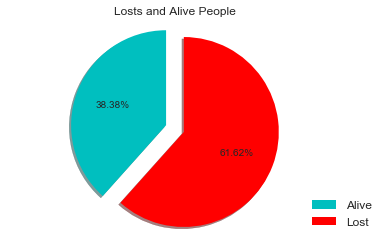

In [102]:
plt.pie(glc,
        textprops={'fontsize': 12},
        colors=cols_lc,
        startangle=90,
        shadow=True,
        explode=(0.1,0.1),
        autopct='%0.2f%%',
        radius=1);

plt.title('Losts and Alive People');
plt.legend(ulc ,bbox_to_anchor=(1,0), loc='lower center', fontsize=12);
plt.axis('equal');

## Q-04 - Pie Chart Above

            Unfortunately our losts were greater then we imagined.

## Q-05 - Pie Chart Between Gender for Alive People %

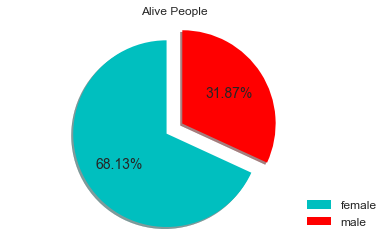

In [103]:
gc_piec('Alive')

plt.title('Alive People');
plt.legend(lb_gc, bbox_to_anchor=(1,0), loc='lower center', fontsize=12);
plt.axis('equal');

## Q-05 - Pie Chart Above

            As a human cortezy, men sacrificed themselves to guarantee women lives.

## Q-06 - Pie Chart Between Gender for Lost People %

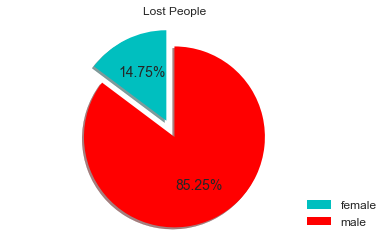

In [104]:
gc_piec('Lost')

plt.title('Lost People');
plt.legend(lb_gc, bbox_to_anchor=(1,0), loc='lower center', fontsize=12);
plt.axis('equal');

## Q-06 - Pie Chart Above

            In comparison to alive people, this situation was exactly the opposite, being a small part of this terrible     lost.

## Q-07 - Gender Stacked Bar Chart for Age Category - Alive People

            a7 = Filtered a Life Condition List of Lost people, grouped by Age Category and Gender.

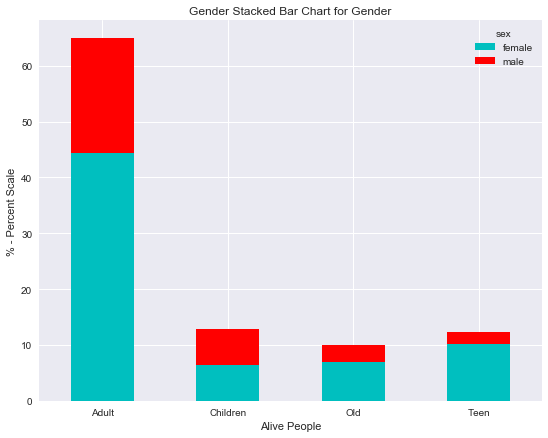

In [105]:
lc_barc('Alive','age_category', 'sex', 'c', 'r')

plt.xlabel('Alive People');
plt.ylabel('% - Percent Scale');

## Q-07 - Stacked Bar Chart Above

            By the same cortezy guaranteed by men, women were intensivelly saved in this tragedy.

## Q-08 - Gender Stacked Bar Chart for Age Category - Lost People

            a8 = Filtered a Life Condition List of Lost people, grouped by Age Category and Gender.

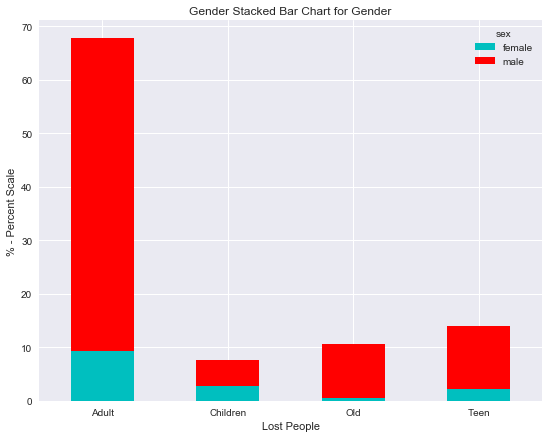

In [30]:
lc_barc('Lost','age_category', 'sex', 'c', 'r')


plt.xlabel('Lost People');
plt.ylabel('% - Percent Scale');

## Q-08 - Stacked Bar Chart Above

            As obviously, in the opposite of situation showed before, right here our men losts were expressively in every Age Category created to support our dataset.

# 04 - Conclusions

            Finaly we got the conclusions, and for our founds, these analysis compared the Age differences agrouping them by categories, the alive and lost people, the gender of them, using several graphs to support efectively our discoverings during the research.
            Of course, there are a lot more questions that dataset may support us for good decision.
            As well as every chart had answered relevant questions showed during this section of analysis.
            
# Limitations

            Considering all passengers on board being 1300 and meanwhile we suppose a sum of 30 people as crew. Thence, we  have a total of 1330 people on board that disaster. It actually meant that our results were significantly impacted by a losing of almost 30% of datas.
            
            For cleaning missing data we took some steps:
            
                To fill nill for 'age' column was created a new column called 'age_category', being ages among life phases.
                The nill datas of column'age' was filled with the median according to datas of 'age_category'.
                Then the 'embarked' column nill data was filled with data 'U' being the Unknown place.
                By the way for 'cabin' column was filled a total of 687 nill values with [UCN] Unknown Cabin Number and it          does not considered as criteria for analysis.
                


## Other Questions that can be Analysed in this dataset:
            
            How many Survived people for class can we find into dataset?
            How many Survived people for class can we find into dataset by gender?
            How many people does tragedy have for port of Embark?
            How many Survived per port and gender do we have?
            
# Resources
            
            Titanic Data Base from Kraggle;
            Python Documentation;
            Python Libraries Documantation {Pandas, Numpy, Matplotlib, Matplotlib Patches  and Seaborn};
            StackOverflow Discutions;
            Udacity Data Science I - Fundamentals Tasks.


## Final Coment

            As well as we can see, this is a ocean of questions that dataset can provide us.
            If you are really curious and thirst for discoverings you have to keep bringing hypothesis as much as you can.
            This is a great attribute for those who decides beeing a Data Scientist.
            
            
### Thanks for the apportunity of doing this job, with pleasure Marcelo Peres!